In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Create a set of latitude and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
coordinates=list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data
city_data=[]
#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count =1
set_count =1
# Loop through all the cities in our list
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes
    if (i%50 == 0 and i>=50):
        set_count+=1
        record_count=1
        time.sleep(5)
    #Create endpoint URL with each city
    city_url=url+"&q="+city.replace(" ","+")
    #log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to the record count
    record_count +=1
    
    # Run an API request for each of the cities
    try:
        #parse the JSON and retrieve data 
        city_weather=requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp=city_weather['main']['temp_max']
        city_humidity=city_weather['main']['humidity']
        city_clouds=city_weather['clouds']['all']
        city_wind=city_weather['wind']['speed']
        city_country=city_weather['sys']['country']
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                        'Lat': city_lat,
                        'Lng': city_lng,
                        'Max Temp': city_max_temp,
                        'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
# If an error is experienced, skip the city
    except:
        print('City not found, skipping...')
        continue

#Indicate that Data Loading is complte
print('-----------------------------')
print('Data Retrieval Complete  ')
print('-----------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | vagur
Processing Record 3 of Set 1 | ishinomaki
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | srandakan
Processing Record 6 of Set 1 | tamandare
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | concepcion del uruguay
Processing Record 10 of Set 1 | turinskaya sloboda
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | havoysund
Processing Record 13 of Set 1 | andenes
Processing Record 14 of Set 1 | keti bandar
Processing Record 15 of Set 1 | okhotsk
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | gazanjyk
Processing Record 19 of Set 1 | puerto escondido
Processing Record 20 of Set 1 | jais
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | road town
Processing Reco

Processing Record 41 of Set 4 | kirakira
Processing Record 42 of Set 4 | talnakh
Processing Record 43 of Set 4 | imeni poliny osipenko
Processing Record 44 of Set 4 | kuantan
Processing Record 45 of Set 4 | osijek
Processing Record 46 of Set 4 | belmonte
Processing Record 47 of Set 4 | tromso
Processing Record 48 of Set 4 | saint-pierre
Processing Record 49 of Set 4 | eydhafushi
Processing Record 50 of Set 4 | mosquera
Processing Record 1 of Set 5 | pucallpa
Processing Record 2 of Set 5 | hun
Processing Record 3 of Set 5 | dhidhdhoo
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | kawerau
Processing Record 6 of Set 5 | saleaula
City not found, skipping...
Processing Record 7 of Set 5 | padang
Processing Record 8 of Set 5 | apex
Processing Record 9 of Set 5 | puerto ayora
Processing Record 10 of Set 5 | yuryevets
Processing Record 11 of Set 5 | roald
Processing Record 12 of Set 5 | bilibino
Processing Record 13 of Set 5 | bengkulu
Processing Record 14 of Set 5 | live

Processing Record 27 of Set 8 | luganville
Processing Record 28 of Set 8 | shaowu
Processing Record 29 of Set 8 | ilulissat
Processing Record 30 of Set 8 | gerede
Processing Record 31 of Set 8 | mountain home
Processing Record 32 of Set 8 | yabelo
Processing Record 33 of Set 8 | safford
Processing Record 34 of Set 8 | alotau
City not found, skipping...
Processing Record 35 of Set 8 | xining
Processing Record 36 of Set 8 | rawson
Processing Record 37 of Set 8 | taksimo
Processing Record 38 of Set 8 | wattegama
Processing Record 39 of Set 8 | san cristobal
Processing Record 40 of Set 8 | aflu
City not found, skipping...
Processing Record 41 of Set 8 | khasan
Processing Record 42 of Set 8 | ostrovnoy
Processing Record 43 of Set 8 | turukhansk
Processing Record 44 of Set 8 | kieta
Processing Record 45 of Set 8 | launceston
Processing Record 46 of Set 8 | zhanakorgan
Processing Record 47 of Set 8 | sambava
Processing Record 48 of Set 8 | broken hill
Processing Record 49 of Set 8 | progreso


Processing Record 15 of Set 12 | uren
Processing Record 16 of Set 12 | qaqortoq
Processing Record 17 of Set 12 | awbari
Processing Record 18 of Set 12 | krasnoselkup
Processing Record 19 of Set 12 | kochi
Processing Record 20 of Set 12 | kirkenaer
Processing Record 21 of Set 12 | huasahuasi
Processing Record 22 of Set 12 | avera
Processing Record 23 of Set 12 | broome
Processing Record 24 of Set 12 | pareora
Processing Record 25 of Set 12 | saint-joseph
Processing Record 26 of Set 12 | axim
Processing Record 27 of Set 12 | kutum
Processing Record 28 of Set 12 | berasia
Processing Record 29 of Set 12 | nechi
Processing Record 30 of Set 12 | pisco
Processing Record 31 of Set 12 | toora-khem
Processing Record 32 of Set 12 | lata
Processing Record 33 of Set 12 | tawkar
City not found, skipping...
Processing Record 34 of Set 12 | skalistyy
City not found, skipping...
Processing Record 35 of Set 12 | emerald
Processing Record 36 of Set 12 | carutapera
Processing Record 37 of Set 12 | ozernov

In [16]:
city_weather=requests.get(city_url).json()
#parse out the needed data
city_lat = city_weather['coord']['lat']

In [18]:
# Convert the array of dictionaries to a pandas DataFrame
city_data_df=pd.DataFrame(city_data)

In [19]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,38.64,88,100,3.74,GL,2022-07-06 22:18:18
1,Vagur,61.4732,-6.8119,48.24,86,14,18.66,FO,2022-07-06 22:18:18
2,Ishinomaki,38.4167,141.3000,72.61,86,74,10.47,JP,2022-07-06 22:18:18
3,Aykhal,66.0000,111.5000,54.39,74,2,10.16,RU,2022-07-06 22:18:19
4,Srandakan,-7.9386,110.2506,74.97,90,98,4.97,ID,2022-07-06 22:18:19
5,Tamandare,-8.7597,-35.1047,75.33,88,3,10.94,BR,2022-07-06 22:18:20
6,College,64.8569,-147.8028,83.59,50,1,4.14,US,2022-07-06 22:18:20
7,Ushuaia,-54.8000,-68.3000,22.57,86,20,5.12,AR,2022-07-06 22:18:20
8,Concepcion Del Uruguay,-32.4825,-58.2372,62.98,94,100,1.01,AR,2022-07-06 22:14:07
9,Turinskaya Sloboda,57.6232,64.3858,52.81,86,84,5.86,RU,2022-07-06 22:18:21


In [21]:
new_column_orders=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_orders]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-07-06 22:18:18,65.6145,-37.6368,38.64,88,100,3.74
1,Vagur,FO,2022-07-06 22:18:18,61.4732,-6.8119,48.24,86,14,18.66
2,Ishinomaki,JP,2022-07-06 22:18:18,38.4167,141.3000,72.61,86,74,10.47
3,Aykhal,RU,2022-07-06 22:18:19,66.0000,111.5000,54.39,74,2,10.16
4,Srandakan,ID,2022-07-06 22:18:19,-7.9386,110.2506,74.97,90,98,4.97
...,...,...,...,...,...,...,...,...,...
547,Male,MV,2022-07-06 22:22:48,4.1748,73.5089,82.60,77,100,10.80
548,Waddan,LY,2022-07-06 22:22:48,29.1614,16.1390,84.97,30,0,9.01
549,Astara,AZ,2022-07-06 22:22:49,38.5000,48.6667,63.14,55,59,3.15
550,Luanda,AO,2022-07-06 22:19:45,-8.8368,13.2343,67.93,91,0,6.91


In [22]:
# Output the file
#Create the output file
output_data_file="weather_data/cities.csv"
# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Get data for plotting 
# Extract data form the DataFrame for plotting
lats=city_data_df['Lat']
max_temps=city_data_df['Max Temp']
humidity=city_data_df['Humidity']
cloudiness=city_data_df['Cloudiness']
wind_speed=city_data_df['Wind Speed']

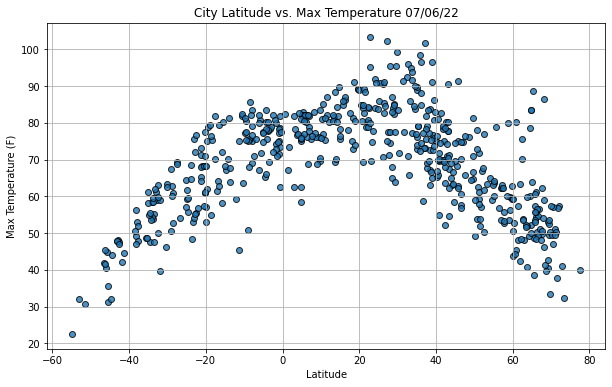

In [30]:
# Import time module
import time

# Build the scatter plot for latitude and max temperature
plt.subplots(figsize=(10,6))
plt.scatter(lats, max_temps, 
           edgecolor='black',linewidth=1,marker="o",
           alpha=0.8)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

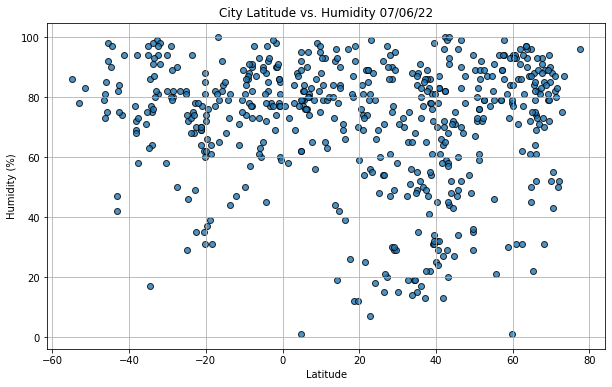

In [35]:
# Build the scatter plot for latitude and max temperature
plt.subplots(figsize=(10,6))
plt.scatter(lats, humidity, 
           edgecolor='black',linewidth=1,marker="o",
           alpha=0.8)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity '+ time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

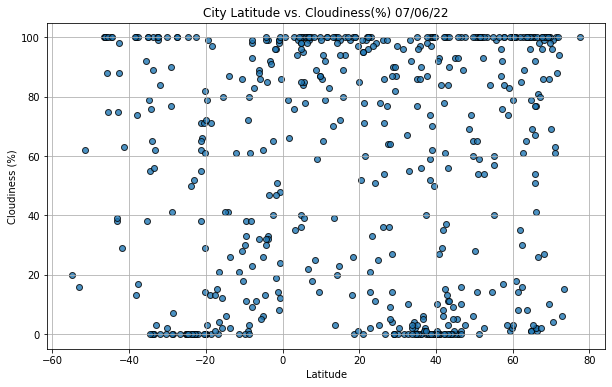

In [36]:
# Build the scatter plot for latitude and max temperature
plt.subplots(figsize=(10,6))
plt.scatter(lats, cloudiness, 
           edgecolor='black',linewidth=1,marker="o",
           alpha=0.8)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness(%) '+ time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

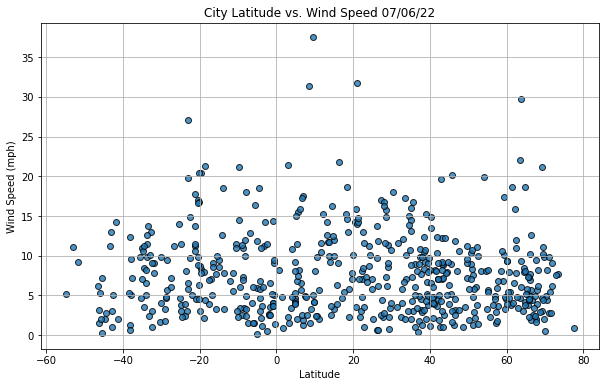

In [37]:
# Build the scatter plot for latitude and max temperature
plt.subplots(figsize=(10,6))
plt.scatter(lats, wind_speed, 
           edgecolor='black',linewidth=1,marker="o",
           alpha=0.8)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()